In [ ]:
#使用PCA实现PCA对手写数字数据集的降维

In [1]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"D:\ML\sklearn\pca\digit_recognizor.csv")

In [4]:
data.shape

(42000, 785)

In [5]:
X = data.iloc[:,1:]

In [6]:
y = data.iloc[:,0]

In [7]:
X.shape

(42000, 784)

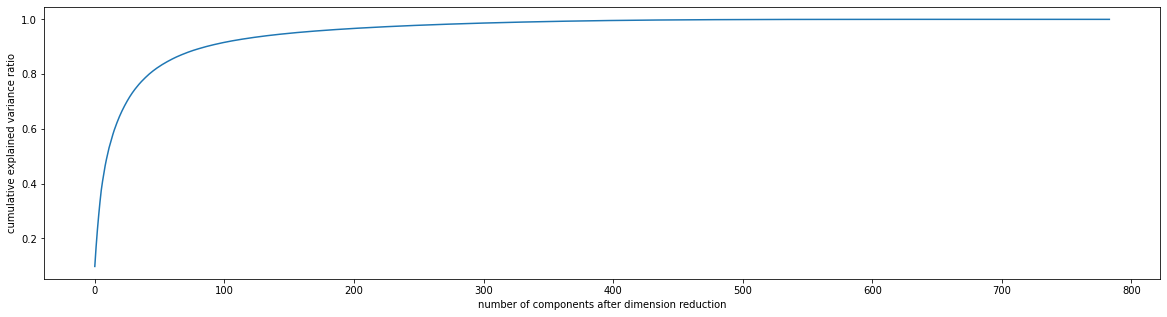

In [8]:
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [ ]:
#选取曲边的转折点，即100-200为降维后的维度比较合适
#下面首先选取0-100的维度，把降维后的数据放入随机森林中进行交叉验证，看选取维度0-100时候的模型效果

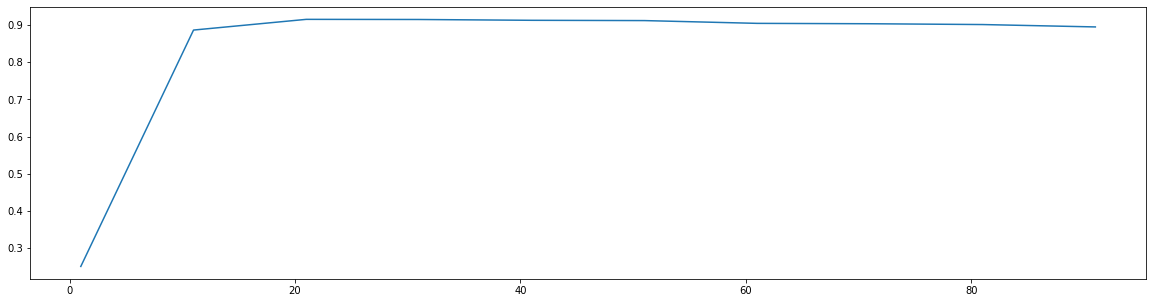

In [9]:
#======【TIME WARNING：2mins 30s】======#
score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

In [ ]:
#从上图可以看出，取20的维度左右的可以让模型的效果最好
#故下面让模型在10-25的维度进行遍历

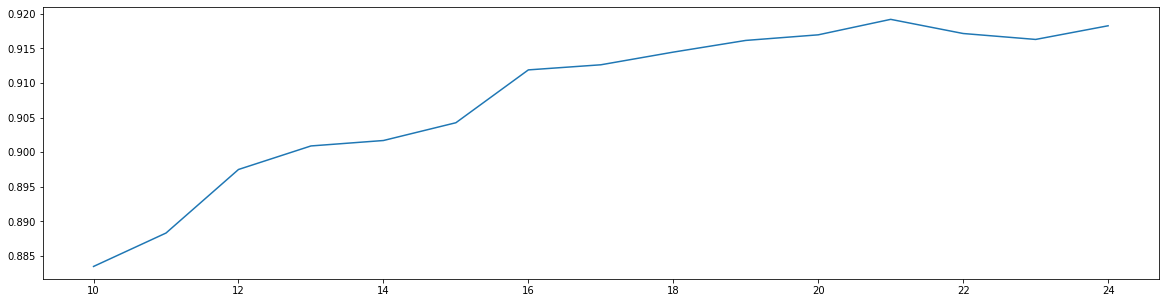

In [10]:
#======【TIME WARNING：2mins 30s】======#
score = []
for i in range(10,25):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)
plt.show()

In [ ]:
#从上图可以看出，21是顶点，所以21是最佳的维度

In [15]:
X_dr = PCA(21).fit_transform(X)

In [16]:
X_dr.shape

(42000, 21)

In [17]:
#======【TIME WARNING 30s】======#
cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()

0.9189047619047619

In [ ]:
#21维度拥有92%左右的效果

In [18]:
#======【TIME WARNING1min 30s】======#
#调参数，提高泛化误差
cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()

0.9433333333333331

In [19]:
#已经拥有94%的信息了，但由于RFC模型的限制，难以进一步提高，所以可以换一个模型

In [20]:
#使用KNN
from sklearn.neighbors import KNeighborsClassifier as KNN

In [21]:
cross_val_score(KNN(),X_dr,y,cv=5).mean()

0.9674761904761905

In [ ]:
#在经过PCA降维之后，KNN的效果很好

In [ ]:
#画K值的学习曲线

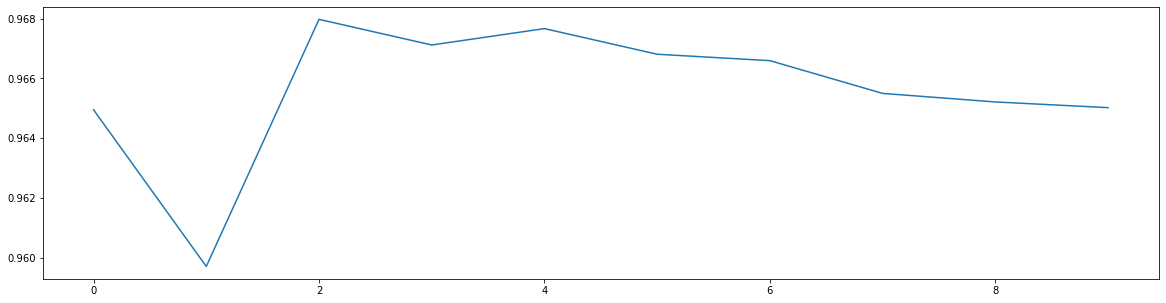

In [22]:
#======【TIME WARNING】======#
score = []
X_dr = PCA(21).fit_transform(X)
for i in range(10):
    once = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()

In [ ]:
#i=2，即k=3时，效果最好

In [23]:
cross_val_score(KNN(3),X_dr,y,cv=5).mean()

0.9679761904761905

In [ ]:
#交叉验证的结果提高了0.0005

In [26]:
#计算模型运行时间
#=======【TIME WARNING: 3mins】======#

In [27]:
import timeit

In [ ]:
#使用%%timeit必须将其放在第一行

In [28]:
%%timeit
cross_val_score(KNN(3),X_dr,y,cv=5).mean()

23.5 s ± 1.43 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
